In [1]:
# import basic modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# wt and ko paths for currents dwells features extracted for CNN training with CC or CT contexts
wt_CCreads_filepath = "/lustre/bio_running/C_to_U_editing_minimap2_spliced/wt.T_C_reference_currents_dwells_features_reads/CCcontext_reads_currents_dwells_reads_forward.tsv"
wt_CTreads_filepath = "/lustre/bio_running/C_to_U_editing_minimap2_spliced/wt.T_C_reference_currents_dwells_features_reads/CTcontext_reads_currents_dwells_reads_forward_rev.tsv"
ko_CCreads_filepath = "/lustre/bio_running/C_to_U_editing_minimap2_spliced/ko.T_C_reference_currents_dwells_features_reads/CCcontext_reads_currents_dwells_reads_forward.tsv"
ko_CTreads_filepath = "/lustre/bio_running/C_to_U_editing_minimap2_spliced/ko.T_C_reference_currents_dwells_features_reads/CTcontext_reads_currents_dwells_reads_forward_rev.tsv"

In [3]:
# load wt CC reads
columns = ["contig", "pos1based", "read_name", "strand", "cur-3", "cur-2", "cur-1", "cur0", "cur+1", "cur+2", "cur+3", "dw-3", "dw-2", "dw-1", "dw0", "dw+1", "dw+2", "dw+3", "label"]
df_wt_CC = pd.read_table(wt_CCreads_filepath, header=None)
df_wt_CC["Label"] = ["CCcontext" for i in range(df_wt_CC.shape[0])]
df_wt_CC.columns = columns
df_wt_CC = df_wt_CC.query("strand == '+'")
df_wt_CC.dropna(inplace=True)
df_wt_CC.reset_index(drop=True, inplace=True)
df_wt_CC

,contig,pos1based,read_name,strand,cur-3,cur-2,cur-1,cur0,cur+1,cur+2,cur+3,dw-3,dw-2,dw-1,dw0,dw+1,dw+2,dw+3,label
0,chr1,4916335,77fe2710-69c5-42d2-903c-82baf86a461f,+,100.353,112.464,85.107,98.505,123.608,88.590,80.269,52.0,21.0,12.0,30.0,50.0,27.0,72.0,CCcontext
1,chr1,4916336,77fe2710-69c5-42d2-903c-82baf86a461f,+,112.464,85.107,98.505,123.608,88.590,80.269,80.023,21.0,12.0,30.0,50.0,27.0,72.0,7.0,CCcontext
2,chr1,4916350,77fe2710-69c5-42d2-903c-82baf86a461f,+,80.302,82.987,86.164,91.136,80.413,77.713,79.143,19.0,22.0,42.0,34.0,159.0,18.0,7.0,CCcontext
3,chr1,4916356,77fe2710-69c5-42d2-903c-82baf86a461f,+,79.143,77.006,84.493,103.380,114.128,76.524,83.482,7.0,9.0,17.0,20.0,10.0,10.0,18.0,CCcontext
4,chr1,4916361,77fe2710-69c5-42d2-903c-82baf86a461f,+,76.524,83.482,80.568,82.344,91.938,107.777,81.586,10.0,18.0,40.0,22.0,28.0,25.0,64.0,CCcontext
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53157896,chrM,16011,70f4895a-a2e7-4559-9c50-c53015444ead,+,67.310,76.863,84.590,103.048,85.473,109.042,106.668,26.0,18.0,32.0,21.0,53.0,45.0,31.0,CCcontext
53157897,chrM,16013,70f4895a-a2e7-4559-9c50-c53015444ead,+,84.590,103.048,85.473,109.042,106.668,98.821,82.694,32.0,21.0,53.0,45.0,31.0,21.0,81.0,CCcontext
53157898,chrM,16018,70f4895a-a2e7-4559-9c50-c53015444ead,+,98.821,82.694,67.099,74.602,85.991,102.665,96.273,21.0,81.0,17.0,60.0,41.0,31.0,49.0,CCcontext
53157899,chrM,16019,70f4895a-a2e7-4559-9c50-c53015444ead,+,82.694,67.099,74.602,85.991,102.665,96.273,77.022,81.0,17.0,60.0,41.0,31.0,49.0,10.0,CCcontext


In [4]:
# load ko CT reads
df_wt_CT = pd.read_table(wt_CTreads_filepath, header=None)
df_wt_CT["Label"] = ["CTcontext" for i in range(df_wt_CT.shape[0])]
df_wt_CT.columns = columns
df_wt_CT = df_wt_CT.query("strand == '+'")
df_wt_CT.dropna(inplace=True)
df_wt_CT.reset_index(drop=True, inplace=True)
df_wt_CT

,contig,pos1based,read_name,strand,cur-3,cur-2,cur-1,cur0,cur+1,cur+2,cur+3,dw-3,dw-2,dw-1,dw0,dw+1,dw+2,dw+3,label
0,chr1,4916653,77fe2710-69c5-42d2-903c-82baf86a461f,+,95.306,88.529,96.487,117.529,107.132,82.500,95.207,19.0,32.0,20.0,15.0,56.0,10.0,24.0,CTcontext
1,chr1,4916703,77fe2710-69c5-42d2-903c-82baf86a461f,+,97.257,83.890,89.212,113.534,116.489,89.391,89.735,33.0,11.0,27.0,83.0,33.0,37.0,52.0,CTcontext
2,chr1,4916875,77fe2710-69c5-42d2-903c-82baf86a461f,+,72.403,72.885,84.871,91.457,92.723,108.076,126.632,38.0,20.0,67.0,17.0,20.0,59.0,20.0,CTcontext
3,chr1,4948316,df199678-e434-4f7b-929b-1f4d8d1f33b8,+,80.171,82.347,83.372,91.306,101.504,109.781,71.638,27.0,29.0,8.0,10.0,32.0,18.0,38.0,CTcontext
4,chr1,4959750,df199678-e434-4f7b-929b-1f4d8d1f33b8,+,75.340,73.235,70.917,75.352,86.657,84.932,114.078,34.0,89.0,6.0,30.0,38.0,7.0,7.0,CTcontext
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228097,chrM,15870,db12bb13-ccbb-4d09-ae91-3869b86a85a0,+,106.105,79.214,89.730,94.317,104.647,89.976,75.815,14.0,33.0,24.0,164.0,21.0,76.0,75.0,CTcontext
1228098,chrM,15984,db12bb13-ccbb-4d09-ae91-3869b86a85a0,+,126.604,70.778,75.172,103.567,72.238,75.140,68.325,47.0,20.0,14.0,34.0,8.0,24.0,20.0,CTcontext
1228099,chrM,15539,70f4895a-a2e7-4559-9c50-c53015444ead,+,85.585,79.267,82.605,92.984,89.056,78.263,89.128,16.0,17.0,8.0,20.0,80.0,39.0,37.0,CTcontext
1228100,chrM,15617,70f4895a-a2e7-4559-9c50-c53015444ead,+,97.176,78.925,89.138,104.902,121.299,91.117,79.351,43.0,36.0,84.0,15.0,10.0,13.0,7.0,CTcontext


In [5]:
# concat into a unique dataframe
df_wt = pd.concat([df_wt_CC, df_wt_CT])
#delete staring df CC and CT to spare memory
del(df_wt_CC)
del(df_wt_CT)

# reset index
df_wt.reset_index(drop=True, inplace=True)

# drop dwells 
df_wt = df_wt[("contig	pos1based	read_name	strand	cur-3	cur-2	cur-1	cur0	cur+1	cur+2	cur+3".split("\t")+["label"])].copy()
df_wt

# print final dataframe
df_wt

,contig,pos1based,read_name,strand,cur-3,cur-2,cur-1,cur0,cur+1,cur+2,cur+3,label
0,chr1,4916335,77fe2710-69c5-42d2-903c-82baf86a461f,+,100.353,112.464,85.107,98.505,123.608,88.590,80.269,CCcontext
1,chr1,4916336,77fe2710-69c5-42d2-903c-82baf86a461f,+,112.464,85.107,98.505,123.608,88.590,80.269,80.023,CCcontext
2,chr1,4916350,77fe2710-69c5-42d2-903c-82baf86a461f,+,80.302,82.987,86.164,91.136,80.413,77.713,79.143,CCcontext
3,chr1,4916356,77fe2710-69c5-42d2-903c-82baf86a461f,+,79.143,77.006,84.493,103.380,114.128,76.524,83.482,CCcontext
4,chr1,4916361,77fe2710-69c5-42d2-903c-82baf86a461f,+,76.524,83.482,80.568,82.344,91.938,107.777,81.586,CCcontext
...,...,...,...,...,...,...,...,...,...,...,...,...
54385998,chrM,15870,db12bb13-ccbb-4d09-ae91-3869b86a85a0,+,106.105,79.214,89.730,94.317,104.647,89.976,75.815,CTcontext
54385999,chrM,15984,db12bb13-ccbb-4d09-ae91-3869b86a85a0,+,126.604,70.778,75.172,103.567,72.238,75.140,68.325,CTcontext
54386000,chrM,15539,70f4895a-a2e7-4559-9c50-c53015444ead,+,85.585,79.267,82.605,92.984,89.056,78.263,89.128,CTcontext
54386001,chrM,15617,70f4895a-a2e7-4559-9c50-c53015444ead,+,97.176,78.925,89.138,104.902,121.299,91.117,79.351,CTcontext


In [6]:
# same things but for ko CC and CT reads
# load ko CC reads
columns = ["contig", "pos1based", "read_name", "strand", "cur-3", "cur-2", "cur-1", "cur0", "cur+1", "cur+2", "cur+3", "dw-3", "dw-2", "dw-1", "dw0", "dw+1", "dw+2", "dw+3", "label"]
df_ko_CC = pd.read_table(ko_CCreads_filepath, header=None)
df_ko_CC["Label"] = ["CCcontext" for i in range(df_ko_CC.shape[0])]
df_ko_CC.columns = columns
df_ko_CC = df_ko_CC.query("strand == '+'")
df_ko_CC.dropna(inplace=True)
df_ko_CC.reset_index(drop=True, inplace=True)

# load ko CT reads
df_ko_CT = pd.read_table(ko_CTreads_filepath, header=None)
df_ko_CT["Label"] = ["CTcontext" for i in range(df_ko_CT.shape[0])]
df_ko_CT.columns = columns
df_ko_CT = df_ko_CT.query("strand == '+'")
df_ko_CT.dropna(inplace=True)
df_ko_CT.reset_index(drop=True, inplace=True)

# concat into a unique dataframe
df_ko = pd.concat([df_ko_CC, df_ko_CT])
#delete staring df CC and CT to spare memory
del(df_ko_CC)
del(df_ko_CT)

# reset index
df_ko.reset_index(drop=True, inplace=True)

# drop dwells 
df_ko = df_ko[("contig	pos1based	read_name	strand	cur-3	cur-2	cur-1	cur0	cur+1	cur+2	cur+3".split("\t")+["label"])].copy()
df_ko

# print final dataframe
df_ko

,contig,pos1based,read_name,strand,cur-3,cur-2,cur-1,cur0,cur+1,cur+2,cur+3,label
0,chr1,4878142,91b4c57f-442a-4d2b-a2dd-5f214d4dcff1,+,85.909,100.435,86.191,104.374,109.279,79.805,92.550,CCcontext
1,chr1,4878145,91b4c57f-442a-4d2b-a2dd-5f214d4dcff1,+,104.374,109.279,79.805,92.550,86.629,82.202,93.567,CCcontext
2,chr1,4878148,91b4c57f-442a-4d2b-a2dd-5f214d4dcff1,+,92.550,86.629,82.202,93.567,86.781,79.718,75.163,CCcontext
3,chr1,4878151,91b4c57f-442a-4d2b-a2dd-5f214d4dcff1,+,93.567,86.781,79.718,75.163,86.260,100.326,70.244,CCcontext
4,chr1,4878156,91b4c57f-442a-4d2b-a2dd-5f214d4dcff1,+,100.326,70.244,78.283,90.549,103.799,75.307,70.734,CCcontext
...,...,...,...,...,...,...,...,...,...,...,...,...
68935677,chrM,15738,1af1de27-c828-465f-af9b-06292ae3dad8,+,76.596,84.170,94.386,106.781,78.607,70.609,74.413,CTcontext
68935678,chrM,15886,1af1de27-c828-465f-af9b-06292ae3dad8,+,80.363,74.696,86.171,92.492,86.279,79.873,87.102,CTcontext
68935679,chrM,15731,a7721b9a-2345-411f-80a1-aaed1acf9088,+,64.896,71.147,74.546,79.123,75.696,78.806,77.331,CTcontext
68935680,chrM,15813,a7721b9a-2345-411f-80a1-aaed1acf9088,+,89.776,80.796,93.221,112.292,107.471,79.888,85.060,CTcontext


In [7]:
# focus only on reads falling on illumina ground truth sites
illumina_colnames = pd.read_table("/lustre/bio_running/C_to_U_editing/merged_mm39_columns.txt", header=None)[0].tolist()

illumina = pd.read_table("/lustre/bio_running/C_to_U_editing/merged_mm39.tsv", header=None, names=illumina_colnames)
illumina

,contig_mm39,pos_mm39,contig_mm10,pos_mm10,ref_base,strand,cov_WT,MeanQual_WT,"BaseCount_WT[A,C,G,T]",Subs_WT,SubsFreq_WT,cov_KO,MeanQual_KO,"BaseCount_KO[A,C,G,T]",Subs_KO,SubsFreq_KO,PositionAnnotation,gene_name
0,chr1,4915683,chr1,4845460,C,1,290,35.40,"[0, 258, 0, 32]",CT,0.11,184,35.08,"[0, 184, 0, 0]",-,0.0,UTR3,Lypla1
1,chr1,4915694,chr1,4845471,C,1,290,35.45,"[0, 258, 0, 32]",CT,0.11,183,35.54,"[0, 183, 0, 0]",-,0.0,UTR3,Lypla1
2,chr1,4915851,chr1,4845628,C,1,142,35.19,"[0, 135, 0, 7]",CT,0.05,83,35.00,"[0, 83, 0, 0]",-,0.0,UTR3,Lypla1
3,chr1,4916384,chr1,4846161,C,1,183,35.79,"[0, 164, 0, 19]",CT,0.10,134,35.85,"[0, 134, 0, 0]",-,0.0,UTR3,Lypla1
4,chr1,4967044,chr1,4896821,C,1,439,35.51,"[0, 404, 0, 35]",CT,0.08,325,35.56,"[0, 325, 0, 0]",-,0.0,UTR3,Tcea1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,chrX,166129481,chrX,167346485,C,0,125,35.35,"[0, 119, 0, 6]",CT,0.05,86,35.72,"[0, 86, 0, 0]",-,0.0,UTR3,Prps2
683,chrX,166130959,chrX,167347963,C,0,70,35.71,"[0, 66, 0, 4]",CT,0.06,70,35.58,"[0, 70, 0, 0]",-,0.0,UTR3,Prps2
684,chrX,166131073,chrX,167348077,C,0,116,35.45,"[0, 110, 0, 6]",CT,0.05,128,35.77,"[0, 128, 0, 0]",-,0.0,UTR3,Prps2
685,chrX,166131296,chrX,167348300,C,0,133,35.46,"[0, 120, 0, 13]",CT,0.10,102,35.44,"[0, 102, 0, 0]",-,0.0,UTR3,Prps2


In [8]:
# select only reads of wt falling on g.t. illumina sites
df_wt_gt = pd.merge(df_wt, illumina, how="inner", left_on=["contig","pos1based"], right_on=["contig_mm39", "pos_mm39"])
df_wt_gt

,contig,pos1based,read_name,strand_x,cur-3,cur-2,cur-1,cur0,cur+1,cur+2,...,"BaseCount_WT[A,C,G,T]",Subs_WT,SubsFreq_WT,cov_KO,MeanQual_KO,"BaseCount_KO[A,C,G,T]",Subs_KO,SubsFreq_KO,PositionAnnotation,gene_name
0,chr1,4916384,77fe2710-69c5-42d2-903c-82baf86a461f,+,84.031,87.753,87.564,109.941,103.450,76.586,...,"[0, 164, 0, 19]",CT,0.10,134,35.85,"[0, 134, 0, 0]",-,0.0,UTR3,Lypla1
1,chr1,4916384,b5d5b60e-46ec-42a4-89f5-ad87cf0bd2fd,+,86.047,86.403,82.681,105.737,119.674,82.964,...,"[0, 164, 0, 19]",CT,0.10,134,35.85,"[0, 134, 0, 0]",-,0.0,UTR3,Lypla1
2,chr1,4916384,344013a7-11d0-4d6d-8323-543348d52d37,+,82.015,87.722,87.301,105.610,108.850,77.085,...,"[0, 164, 0, 19]",CT,0.10,134,35.85,"[0, 134, 0, 0]",-,0.0,UTR3,Lypla1
3,chr1,4916384,9bd6cacc-ff9e-44fc-9a37-38e04cf4ff1b,+,83.754,87.480,92.069,106.175,107.077,76.160,...,"[0, 164, 0, 19]",CT,0.10,134,35.85,"[0, 134, 0, 0]",-,0.0,UTR3,Lypla1
4,chr1,4916384,5897c234-f59d-45c8-947d-417f9b373bd3,+,81.525,86.696,86.069,106.583,108.788,76.339,...,"[0, 164, 0, 19]",CT,0.10,134,35.85,"[0, 134, 0, 0]",-,0.0,UTR3,Lypla1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14325,chr11,46619454,68577c0f-0edf-454a-a39c-e2b5ecd6b91c,+,103.927,97.420,87.995,104.498,116.009,126.301,...,"[0, 67, 0, 4]",CT,0.06,52,35.50,"[0, 52, 0, 0]",-,0.0,intergenic,Timd2;Havcr1
14326,chr11,46619454,6a506c24-0732-4ced-bba3-b505a9d5bf69,+,96.034,93.571,89.318,94.180,106.479,116.223,...,"[0, 67, 0, 4]",CT,0.06,52,35.50,"[0, 52, 0, 0]",-,0.0,intergenic,Timd2;Havcr1
14327,chr11,46619454,2c4f6a15-f77b-465c-8a08-e5037496e9ed,+,98.947,93.478,85.028,93.628,108.373,109.372,...,"[0, 67, 0, 4]",CT,0.06,52,35.50,"[0, 52, 0, 0]",-,0.0,intergenic,Timd2;Havcr1
14328,chr11,46619454,185b6e4c-105e-4c26-a20e-83b1c427e501,+,98.305,94.487,87.390,90.572,106.126,112.012,...,"[0, 67, 0, 4]",CT,0.06,52,35.50,"[0, 52, 0, 0]",-,0.0,intergenic,Timd2;Havcr1


In [9]:
df_wt_gt[["contig", "pos1based"]].value_counts()

contig  pos1based
chr2    121983223    782
        121983285    610
        121983221    582
        121983199    557
chr3    144303388    248
                    ... 
chrX    135147837     35
chr3    67511089      32
chr11   46619454      29
chr6    51459917      21
chr1    162422447     12
Length: 129, dtype: int64

In [10]:
# select only reads of ko falling on g.t. illumina sites
df_ko_gt = pd.merge(df_ko, illumina, how="inner", left_on=["contig","pos1based"], right_on=["contig_mm39", "pos_mm39"])
df_ko_gt

,contig,pos1based,read_name,strand_x,cur-3,cur-2,cur-1,cur0,cur+1,cur+2,...,"BaseCount_WT[A,C,G,T]",Subs_WT,SubsFreq_WT,cov_KO,MeanQual_KO,"BaseCount_KO[A,C,G,T]",Subs_KO,SubsFreq_KO,PositionAnnotation,gene_name
0,chr1,4915694,91b4c57f-442a-4d2b-a2dd-5f214d4dcff1,+,80.830,90.088,85.003,95.111,85.702,89.215,...,"[0, 258, 0, 32]",CT,0.11,183,35.54,"[0, 183, 0, 0]",-,0.0,UTR3,Lypla1
1,chr1,4915694,80186c3c-297c-4f9a-967f-6804be95d0d8,+,81.239,91.239,85.035,100.254,103.867,92.811,...,"[0, 258, 0, 32]",CT,0.11,183,35.54,"[0, 183, 0, 0]",-,0.0,UTR3,Lypla1
2,chr1,4915694,9227dff6-12df-4f25-8207-e5ca50119dca,+,82.644,91.643,86.022,98.125,99.408,89.066,...,"[0, 258, 0, 32]",CT,0.11,183,35.54,"[0, 183, 0, 0]",-,0.0,UTR3,Lypla1
3,chr1,4915694,76c36bab-a247-4330-a0db-a4f7f54f922d,+,80.940,81.179,92.476,96.392,103.152,91.588,...,"[0, 258, 0, 32]",CT,0.11,183,35.54,"[0, 183, 0, 0]",-,0.0,UTR3,Lypla1
4,chr1,4915694,a9b63ec4-9c6e-462f-bf0e-b1e454ccb778,+,80.713,92.165,86.114,96.801,88.564,94.011,...,"[0, 258, 0, 32]",CT,0.11,183,35.54,"[0, 183, 0, 0]",-,0.0,UTR3,Lypla1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19146,chr1,162422447,b0f3c4b7-b64f-41b7-9707-46f9806e3f97,+,91.737,88.151,81.403,106.582,90.318,80.005,...,"[0, 352, 0, 24]",CT,0.06,205,35.48,"[0, 205, 0, 0]",-,0.0,UTR3,Vamp4
19147,chr1,162422447,06c9b2be-0496-495d-afcc-a1d72b837376,+,93.692,77.887,76.768,104.041,81.007,82.527,...,"[0, 352, 0, 24]",CT,0.06,205,35.48,"[0, 205, 0, 0]",-,0.0,UTR3,Vamp4
19148,chr1,162422447,9b2a92c8-1b4f-4fe0-b4ec-102a5851cc63,+,92.077,89.957,83.378,91.348,80.464,80.081,...,"[0, 352, 0, 24]",CT,0.06,205,35.48,"[0, 205, 0, 0]",-,0.0,UTR3,Vamp4
19149,chr1,162422447,c23be654-3848-4ce2-a2e6-4fb0c2ee8486,+,102.412,82.566,77.548,103.572,79.042,80.879,...,"[0, 352, 0, 24]",CT,0.06,205,35.48,"[0, 205, 0, 0]",-,0.0,UTR3,Vamp4


In [11]:
df_ko_gt[["contig", "pos1based"]].value_counts()

contig  pos1based
chr2    121983223    826
        121983221    762
        121983285    618
        121983199    544
        29961312     350
                    ... 
        71732295      34
chr3    67511089      34
chr10   87767044      25
chr6    51459917      24
chr1    162422447      6
Length: 151, dtype: int64

In [12]:
# add label genotype
df_wt_gt["genotype"] = "WT"
print(df_wt_gt)
df_ko_gt["genotype"] = "KO"
print(df_ko_gt)

      contig  pos1based                             read_name strand_x  \
0       chr1    4916384  77fe2710-69c5-42d2-903c-82baf86a461f        +   
1       chr1    4916384  b5d5b60e-46ec-42a4-89f5-ad87cf0bd2fd        +   
2       chr1    4916384  344013a7-11d0-4d6d-8323-543348d52d37        +   
3       chr1    4916384  9bd6cacc-ff9e-44fc-9a37-38e04cf4ff1b        +   
4       chr1    4916384  5897c234-f59d-45c8-947d-417f9b373bd3        +   
...      ...        ...                                   ...      ...   
14325  chr11   46619454  68577c0f-0edf-454a-a39c-e2b5ecd6b91c        +   
14326  chr11   46619454  6a506c24-0732-4ced-bba3-b505a9d5bf69        +   
14327  chr11   46619454  2c4f6a15-f77b-465c-8a08-e5037496e9ed        +   
14328  chr11   46619454  185b6e4c-105e-4c26-a20e-83b1c427e501        +   
14329  chr11   46619454  6a7c56c9-5770-49fd-88e0-c5224306cced        +   

         cur-3   cur-2   cur-1     cur0    cur+1    cur+2  ...  Subs_WT  \
0       84.031  87.753  87.564  109.

In [13]:
# merge g.t. DFs
df_gt = pd.concat([df_wt_gt, df_ko_gt])
df_gt

,contig,pos1based,read_name,strand_x,cur-3,cur-2,cur-1,cur0,cur+1,cur+2,...,Subs_WT,SubsFreq_WT,cov_KO,MeanQual_KO,"BaseCount_KO[A,C,G,T]",Subs_KO,SubsFreq_KO,PositionAnnotation,gene_name,genotype
0,chr1,4916384,77fe2710-69c5-42d2-903c-82baf86a461f,+,84.031,87.753,87.564,109.941,103.450,76.586,...,CT,0.10,134,35.85,"[0, 134, 0, 0]",-,0.0,UTR3,Lypla1,WT
1,chr1,4916384,b5d5b60e-46ec-42a4-89f5-ad87cf0bd2fd,+,86.047,86.403,82.681,105.737,119.674,82.964,...,CT,0.10,134,35.85,"[0, 134, 0, 0]",-,0.0,UTR3,Lypla1,WT
2,chr1,4916384,344013a7-11d0-4d6d-8323-543348d52d37,+,82.015,87.722,87.301,105.610,108.850,77.085,...,CT,0.10,134,35.85,"[0, 134, 0, 0]",-,0.0,UTR3,Lypla1,WT
3,chr1,4916384,9bd6cacc-ff9e-44fc-9a37-38e04cf4ff1b,+,83.754,87.480,92.069,106.175,107.077,76.160,...,CT,0.10,134,35.85,"[0, 134, 0, 0]",-,0.0,UTR3,Lypla1,WT
4,chr1,4916384,5897c234-f59d-45c8-947d-417f9b373bd3,+,81.525,86.696,86.069,106.583,108.788,76.339,...,CT,0.10,134,35.85,"[0, 134, 0, 0]",-,0.0,UTR3,Lypla1,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19146,chr1,162422447,b0f3c4b7-b64f-41b7-9707-46f9806e3f97,+,91.737,88.151,81.403,106.582,90.318,80.005,...,CT,0.06,205,35.48,"[0, 205, 0, 0]",-,0.0,UTR3,Vamp4,KO
19147,chr1,162422447,06c9b2be-0496-495d-afcc-a1d72b837376,+,93.692,77.887,76.768,104.041,81.007,82.527,...,CT,0.06,205,35.48,"[0, 205, 0, 0]",-,0.0,UTR3,Vamp4,KO
19148,chr1,162422447,9b2a92c8-1b4f-4fe0-b4ec-102a5851cc63,+,92.077,89.957,83.378,91.348,80.464,80.081,...,CT,0.06,205,35.48,"[0, 205, 0, 0]",-,0.0,UTR3,Vamp4,KO
19149,chr1,162422447,c23be654-3848-4ce2-a2e6-4fb0c2ee8486,+,102.412,82.566,77.548,103.572,79.042,80.879,...,CT,0.06,205,35.48,"[0, 205, 0, 0]",-,0.0,UTR3,Vamp4,KO


In [14]:
# perform pca
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# extract features to be used
X = df_gt["cur-3	cur-2	cur-1	cur0	cur+1	cur+2	cur+3".split("\t")].values
y = df_gt.label.values
genotype = df_gt.genotype.values

# standardize dataset
std = StandardScaler()
pca = PCA()

X = std.fit_transform(X)

# perform PCA
X = pca.fit_transform(X)
X

array([[ 0.52462856, -2.10632998,  1.20508037, ..., -0.12965592,
        -0.5414799 ,  0.23361942],
       [ 0.75239914, -1.47420632,  1.19404352, ..., -1.16856195,
        -0.38505449,  0.81342482],
       [ 0.4074704 , -2.11191423,  1.26392539, ..., -0.62180378,
        -0.2461484 ,  0.60309964],
       ...,
       [-0.869279  , -1.1969793 , -0.37745397, ...,  0.26824491,
        -0.44703988, -0.2406389 ],
       [-0.65268751, -0.3058825 , -0.0797917 , ...,  1.1736681 ,
        -1.16591805, -0.78851311],
       [-0.30440052, -1.29353346,  0.32616398, ...,  0.82289031,
        -0.95579134, -0.90578126]])

In [15]:
X.shape

(33481, 7)

In [16]:
y

array(['CCcontext', 'CCcontext', 'CCcontext', ..., 'CCcontext',
       'CCcontext', 'CCcontext'], dtype=object)

In [17]:
genotype

array(['WT', 'WT', 'WT', ..., 'KO', 'KO', 'KO'], dtype=object)

In [18]:
# push into a pandas dataframe
X = pd.DataFrame(X, columns=[f"PC{i}" for i in range(1,pca.n_components_+1)])
X["label"] = y
X["genotype"] = genotype
X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,label,genotype
0,0.524629,-2.106330,1.205080,0.362756,-0.129656,-0.541480,0.233619,CCcontext,WT
1,0.752399,-1.474206,1.194044,1.275883,-1.168562,-0.385054,0.813425,CCcontext,WT
2,0.407470,-2.111914,1.263925,0.521404,-0.621804,-0.246148,0.603100,CCcontext,WT
3,0.867603,-2.241892,1.227039,-0.078100,0.119756,-0.200050,0.766629,CCcontext,WT
4,0.313051,-1.992407,1.372373,0.683138,-0.611904,-0.351642,0.560185,CCcontext,WT
...,...,...,...,...,...,...,...,...,...
33476,0.105298,-1.060535,0.279181,0.097322,0.412085,-1.266993,-0.418519,CCcontext,KO
33477,-0.729168,0.200272,0.629925,0.659919,1.227390,-1.078715,-0.702514,CCcontext,KO
33478,-0.869279,-1.196979,-0.377454,-0.542737,0.268245,-0.447040,-0.240639,CCcontext,KO
33479,-0.652688,-0.305883,-0.079792,0.596906,1.173668,-1.165918,-0.788513,CCcontext,KO


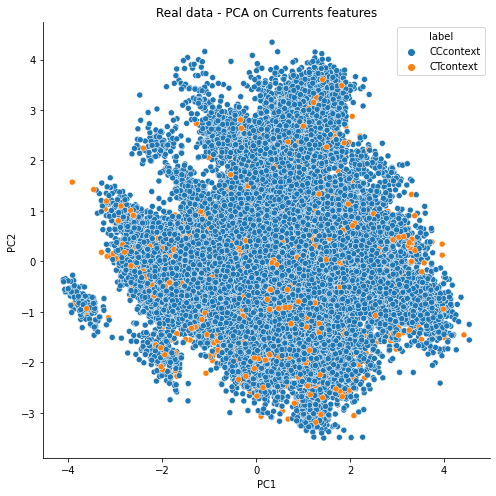

In [19]:
plt.figure(figsize=(7,7))
sn.scatterplot(data=X, x="PC1", y="PC2", hue="label")
plt.title("Real data - PCA on Currents features")
sn.despine()
plt.tight_layout()
plt.show()

In [20]:
X.label.value_counts()

CCcontext    31480
CTcontext     2001
Name: label, dtype: int64

In [21]:
X["contig"] = df_gt.contig.values
X["pos1based"] = df_gt.pos1based.values
X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,label,genotype,contig,pos1based
0,0.524629,-2.106330,1.205080,0.362756,-0.129656,-0.541480,0.233619,CCcontext,WT,chr1,4916384
1,0.752399,-1.474206,1.194044,1.275883,-1.168562,-0.385054,0.813425,CCcontext,WT,chr1,4916384
2,0.407470,-2.111914,1.263925,0.521404,-0.621804,-0.246148,0.603100,CCcontext,WT,chr1,4916384
3,0.867603,-2.241892,1.227039,-0.078100,0.119756,-0.200050,0.766629,CCcontext,WT,chr1,4916384
4,0.313051,-1.992407,1.372373,0.683138,-0.611904,-0.351642,0.560185,CCcontext,WT,chr1,4916384
...,...,...,...,...,...,...,...,...,...,...,...
33476,0.105298,-1.060535,0.279181,0.097322,0.412085,-1.266993,-0.418519,CCcontext,KO,chr1,162422447
33477,-0.729168,0.200272,0.629925,0.659919,1.227390,-1.078715,-0.702514,CCcontext,KO,chr1,162422447
33478,-0.869279,-1.196979,-0.377454,-0.542737,0.268245,-0.447040,-0.240639,CCcontext,KO,chr1,162422447
33479,-0.652688,-0.305883,-0.079792,0.596906,1.173668,-1.165918,-0.788513,CCcontext,KO,chr1,162422447


In [22]:
X_b2m = X.query("pos1based == 121983221")
X_b2m

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,label,genotype,contig,pos1based
9506,-2.465569,0.508164,0.454381,0.349972,-0.633307,0.114413,-0.208680,CCcontext,WT,chr2,121983221
9507,-1.974043,0.209896,0.533800,0.101723,-0.491557,0.188716,-0.172229,CCcontext,WT,chr2,121983221
9508,-1.616795,-0.192876,0.357418,-0.210453,-0.560605,0.259463,-0.316875,CCcontext,WT,chr2,121983221
9509,-2.669448,0.551982,0.365573,0.044884,-0.752480,0.043885,-0.096019,CCcontext,WT,chr2,121983221
9510,-2.566337,0.596478,0.378767,0.281723,-0.625101,-0.054585,-0.132353,CCcontext,WT,chr2,121983221
...,...,...,...,...,...,...,...,...,...,...,...
16127,-1.956345,-0.200712,-0.363043,-0.613267,-1.088688,-0.564301,-0.175770,CTcontext,KO,chr2,121983221
16128,-2.598425,0.235338,0.481446,-0.015125,-0.528924,0.154614,-0.038105,CTcontext,KO,chr2,121983221
16129,-2.319429,0.523831,0.589347,0.357459,-0.471906,0.240412,0.013530,CTcontext,KO,chr2,121983221
16130,-2.474947,0.209337,0.456995,0.124585,-0.595411,0.128571,0.042229,CTcontext,KO,chr2,121983221


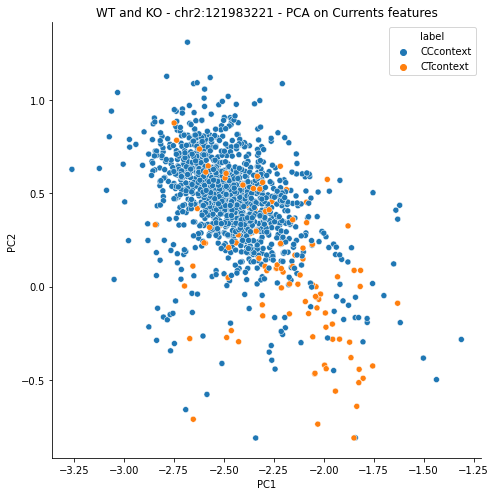

In [45]:
plt.figure(figsize=(7,7))
sn.scatterplot(data=X_b2m, x="PC1", y="PC2", hue="label")
plt.title("WT and KO - chr2:121983221 - PCA on Currents features")
sn.despine()
plt.tight_layout()
plt.show()

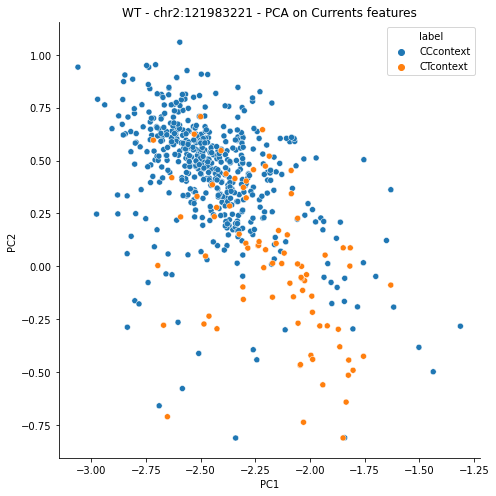

In [24]:
plt.figure(figsize=(7,7))
sn.scatterplot(data=X_b2m.query("genotype == 'WT'"), x="PC1", y="PC2", hue="label")
plt.title("WT - chr2:121983221 - PCA on Currents features")
sn.despine()
plt.tight_layout()
plt.show()

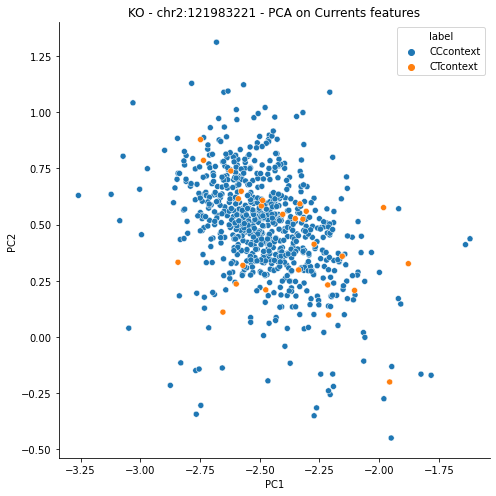

In [25]:
plt.figure(figsize=(7,7))
sn.scatterplot(data=X_b2m.query("genotype == 'KO'"), x="PC1", y="PC2", hue="label")
plt.title("KO - chr2:121983221 - PCA on Currents features")
sn.despine()
plt.tight_layout()
plt.show()

## t-SNE

In [30]:
from sklearn.manifold import TSNE

tsne = TSNE()

X_tsne = tsne.fit_transform(StandardScaler().fit_transform(df_gt["cur-3	cur-2	cur-1	cur0	cur+1	cur+2	cur+3".split("\t")].values))
X_tsne

/lustre/bio_running/C_to_U_editing/src/C_to_U_classifier/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/lustre/bio_running/C_to_U_editing/src/C_to_U_classifier/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[ -9.258245 , -63.459263 ],
       [ -3.0895982, -68.55093  ],
       [ -7.5259132, -64.44176  ],
       ...,
       [  8.042788 ,  25.843601 ],
       [-66.93419  , -19.223093 ],
       [-26.495031 ,  32.577217 ]], dtype=float32)

In [31]:
# push into a pandas dataframe
X_tsne = pd.DataFrame(X_tsne, columns=["tSNE1", "tSNE2"])
X_tsne["label"] = y
X_tsne["genotype"] = genotype
X_tsne

,tSNE1,tSNE2,label,genotype
0,-9.258245,-63.459263,CCcontext,WT
1,-3.089598,-68.550926,CCcontext,WT
2,-7.525913,-64.441757,CCcontext,WT
3,-9.810389,-65.949692,CCcontext,WT
4,-7.423954,-64.091774,CCcontext,WT
...,...,...,...,...
33476,-26.071043,27.071779,CCcontext,KO
33477,-66.686600,-20.081524,CCcontext,KO
33478,8.042788,25.843601,CCcontext,KO
33479,-66.934189,-19.223093,CCcontext,KO


In [32]:
X_tsne.label.value_counts()

CCcontext    31480
CTcontext     2001
Name: label, dtype: int64

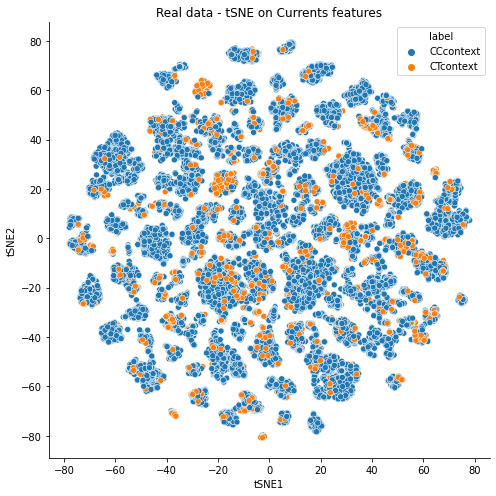

In [34]:
plt.figure(figsize=(7,7))
sn.scatterplot(data=X_tsne, x="tSNE1", y="tSNE2", hue="label")
plt.title("Real data - tSNE on Currents features")
sn.despine()
plt.tight_layout()
plt.show()